It's covered essential data preprocessing, feature engineering, and visualization techniques, as well as an introduction to the Iris & other dataset also used and the KNN algorithm. It provided a solid foundation for working with structured data, handling different data types, and preparing data for machine learning modeling tasks.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/fruit.csv")
df

,fruit,price
0,apple,8.0
1,apple,NaN
2,apple,NaN
3,apple,1.2
4,mango,NaN
5,mango,3.1
6,mango,NaN
7,mango,2.8


In [ ]:
#null values
#df.dropna(inplace = True)
df.dropna(axis=1)


,fruit
0,apple
1,apple
2,apple
3,apple
4,mango
5,mango
6,mango
7,mango


In [ ]:
df

,fruit,price
0,apple,8.0
1,apple,NaN
2,apple,NaN
3,apple,1.2
4,mango,NaN
5,mango,3.1
6,mango,NaN
7,mango,2.8


In [ ]:
df = pd.read_csv("/content/purchase.csv")

In [ ]:
df

,customer,apples,oranges,price
0,Deepa,3.0,0.0,NaN
1,Govind,2.0,2.0,100.0
2,Jyoti,0.0,7.0,150.0
3,Lokesh,3.0,2.0,NaN
4,Prabin,NaN,5.0,100.0
5,Shweta,2.0,NaN,150.0


In [ ]:
#df.fillna(0)
#df.fillna(value = 0.85)
#df.fillna(value = df.price.mean())
#df.fillna(value = df.apples.mean())
#fill null with median
df.fillna(value = df.price.median())

,customer,apples,oranges,price
0,Deepa,3.0,0.0,125.0
1,Govind,2.0,2.0,100.0
2,Jyoti,0.0,7.0,150.0
3,Lokesh,3.0,2.0,125.0
4,Prabin,125.0,5.0,100.0
5,Shweta,2.0,125.0,150.0


In [ ]:
#fillna with forward fill
df.fillna(method = 'ffill')

,customer,apples,oranges,price
0,Deepa,3.0,0.0,NaN
1,Govind,2.0,2.0,100.0
2,Jyoti,0.0,7.0,150.0
3,Lokesh,3.0,2.0,150.0
4,Prabin,3.0,5.0,100.0
5,Shweta,2.0,5.0,150.0


In [ ]:
df.fillna(method='bfill')

,customer,apples,oranges,price
0,Deepa,3.0,0.0,100.0
1,Govind,2.0,2.0,100.0
2,Jyoti,0.0,7.0,150.0
3,Lokesh,3.0,2.0,100.0
4,Prabin,2.0,5.0,100.0
5,Shweta,2.0,NaN,150.0


In [ ]:
#interpolate
df['price'].interpolate(method='linear')

0      NaN
1    100.0
2    150.0
3    125.0
4    100.0
5    150.0
Name: price, dtype: float64

In [ ]:
#Encoding categorical data

df =pd.read_csv("/content/Encoder.csv")
df

,size
0,Small
1,Medium
2,Large
3,Small
4,Medium
5,Large
6,Small
7,Medium
8,Large


In [ ]:
#1.one hot encoding
pd.get_dummies(df['size'])

,Large,Medium,Small
0,False,False,True
1,False,True,False
2,True,False,False
3,False,False,True
4,False,True,False
5,True,False,False
6,False,False,True
7,False,True,False
8,True,False,False


In [ ]:
# 2. Label Encoding
#unique integer
from sklearn.preprocessing import LabelEncoder


In [ ]:
le = LabelEncoder()
le.fit_transform(df['size'])

array([2, 1, 0, 2, 1, 0, 2, 1, 0])

In [ ]:
# 3. Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe =OrdinalEncoder(categories = [['Small','Medium','Large']])
oe.fit_transform(df[['size']])

array([[0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.]])

In [ ]:
df = pd.read_csv("/content/Social_Network_Ads.csv")
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
# Splittting dataset into training & Test set
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1]
y= df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)
print(X)
print(y)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [ ]:
#Feature Engineering & scaling
from sklearn.preprocessing import PolynomialFeatures
df=pd.read_csv("/content/PolynomialFeatures.csv")
poly = PolynomialFeatures(degree=2)
data = poly.fit_transform(df)
print(data)

[[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]
 [ 1.  6. 36.]
 [ 1.  7. 49.]
 [ 1.  8. 64.]
 [ 1.  9. 81.]]


In [ ]:
#feature Decomposition
#PCA
from sklearn.decomposition import PCA
df=pd.DataFrame([[2,4,6,8],[4,8,12,16]])
print(df)
pca =PCA(n_components=2)
reduced_df = pca.fit_transform(df)
print(reduced_df)

   0  1   2   3
0  2  4   6   8
1  4  8  12  16
[[ 5.47722558e+00  6.66133815e-16]
 [-5.47722558e+00  6.66133815e-16]]


In [ ]:
#Standardization
df=pd.read_csv("/content/age_salary.csv")
df

,Age,Salary
0,38,68000
1,43,45000
2,30,65000
3,48,79000
4,40,69000
5,35,58000
6,34,53000
7,49,79000
8,50,88000
9,37,77000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
data = scaler.transform(df)
print(data)

[[-0.36753834 -0.00793826]
 [ 0.39816653 -1.83373764]
 [-1.59266612 -0.246086  ]
 [ 1.16387139  0.86527014]
 [-0.06125639  0.07144432]
 [-0.82696125 -0.80176408]
 [-0.98010223 -1.19867699]
 [ 1.31701237  0.86527014]
 [ 1.47015334  1.57971338]
 [-0.52067931  0.70650498]]


In [ ]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
data=scaler.transform(df)
print(data)


[[0.4        0.53488372]
 [0.65       0.        ]
 [0.         0.46511628]
 [0.9        0.79069767]
 [0.5        0.55813953]
 [0.25       0.30232558]
 [0.2        0.18604651]
 [0.95       0.79069767]
 [1.         1.        ]
 [0.35       0.74418605]]


In [ ]:
#Normalization with feature range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,2))
scaler.fit(df)
data=scaler.transform(df)
print(data)


[[0.8        1.06976744]
 [1.3        0.        ]
 [0.         0.93023256]
 [1.8        1.58139535]
 [1.         1.11627907]
 [0.5        0.60465116]
 [0.4        0.37209302]
 [1.9        1.58139535]
 [2.         2.        ]
 [0.7        1.48837209]]


Visualization

In [ ]:
#Visualization
import seaborn as sns
df= pd.read_csv("/content/Social_Network_Ads.csv")
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
print(df.corr())

                      Age  EstimatedSalary  Purchased
Age              1.000000         0.155238   0.622454
EstimatedSalary  0.155238         1.000000   0.362083
Purchased        0.622454         0.362083   1.000000


<Axes: >

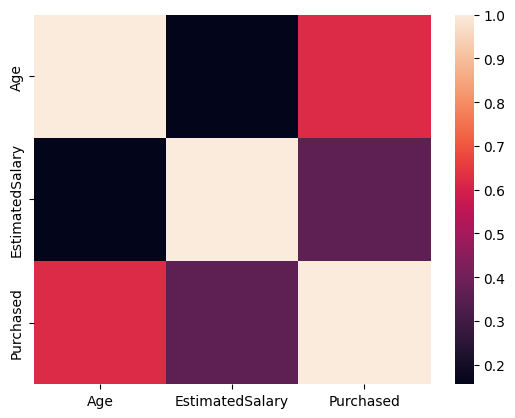

In [ ]:
sns.heatmap(df.corr())

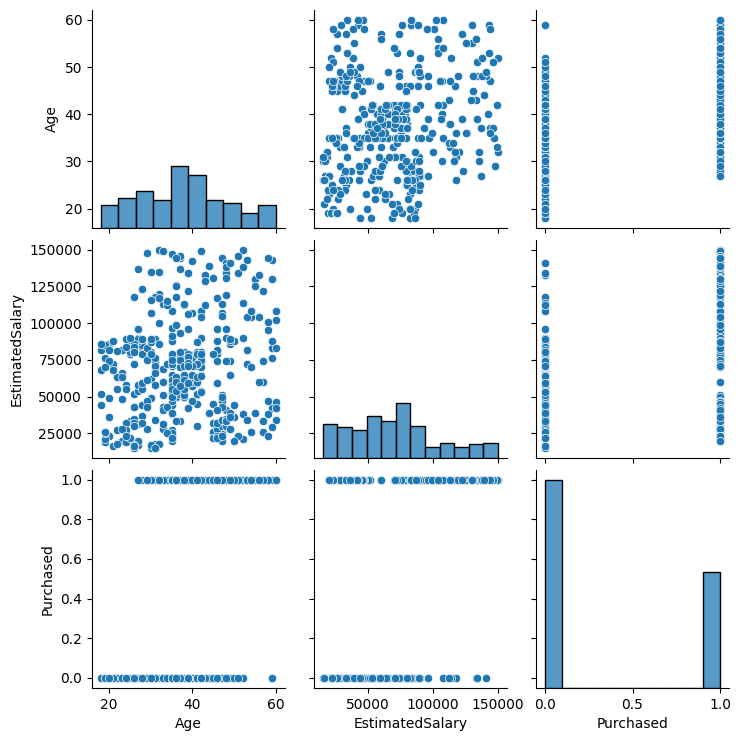

In [ ]:
#pair plot
sns.pairplot(df)

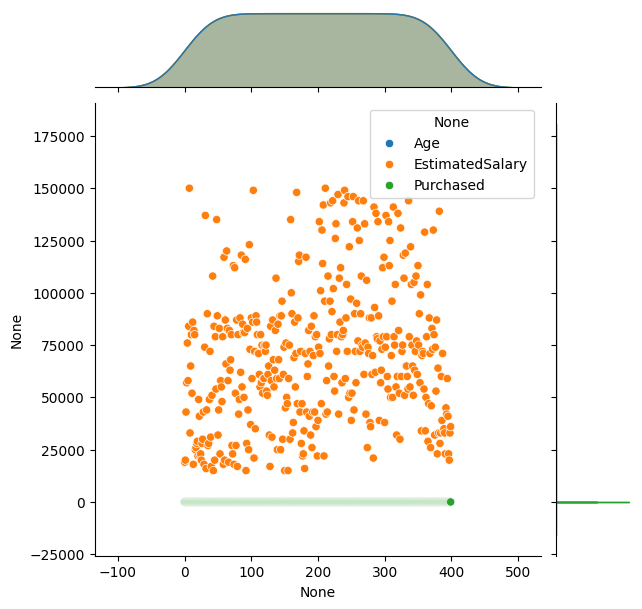

In [ ]:
#joint plot
sns.jointplot(df)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8aaf2dca60>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8aaf2dcfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8aaf2dc310>,
 'medians': [<matplotlib.lines.Line2D at 0x7c8aaf2dd4e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7c8aaf2dd780>,
 'means': []}

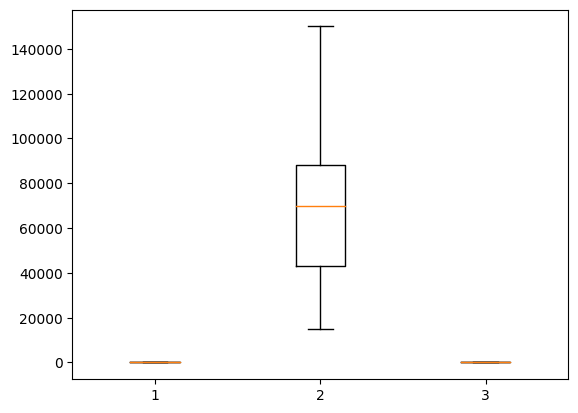

In [ ]:
#Box plot
plt.boxplot(df)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


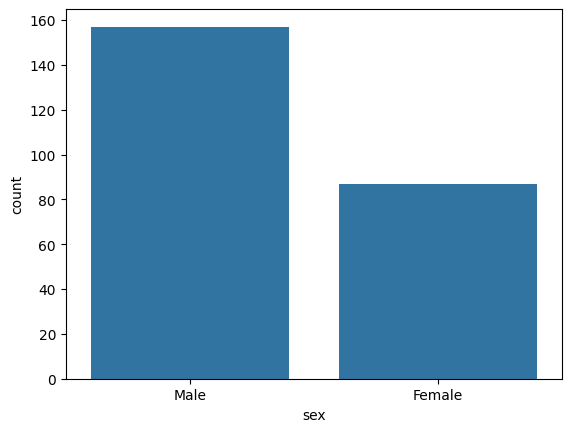

In [ ]:
df = sns.load_dataset('tips')
sns.countplot(x='sex', data=df)
df

In [ ]:
df = sns.load_dataset("attention")
df

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0
5,5,6,divided,1,5.0
6,6,7,divided,1,5.0
7,7,8,divided,1,5.0
8,8,9,divided,1,2.0
9,9,10,divided,1,6.0


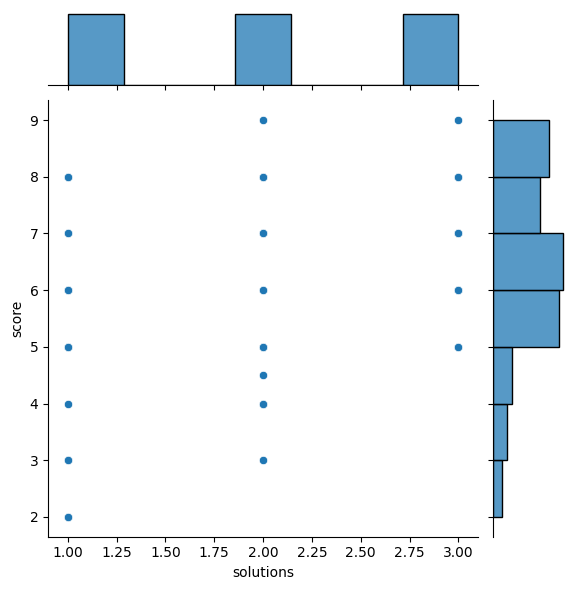

In [ ]:
sns.jointplot(data=df, x='solutions', y='score')

In [ ]:
from sklearn.datasets import load_iris
ds = load_iris()
ds

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
ds.feature_names
ds.data
ds.target_names
ds.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
df= pd.DataFrame(ds.data, columns=ds.feature_names)
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
df['target'] = ds.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


ALGORITHAM


In [ ]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

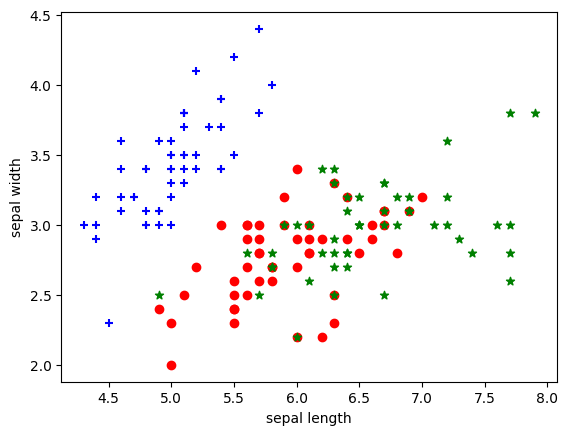

In [ ]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], c='b',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], c='r')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'], c='g',marker='*')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Printing the train and test sets
print(X)
print(y)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(X_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 2 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [ ]:
knn.score(X_test,y_test)

0.9666666666666667

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
